# Лабораторная работа 1. Линейная регрессия

## Задание 0. Подготовка. 

1. Установить Anaconda. Настроить базововое окружение для работы на Python 3.8.X
2. Изучить кратко: 
    1. Python Numpy Tutorial (http://cs231n.github.io/python-numpy-tutorial/)
    2. Numpy quickstart (https://docs.scipy.org/doc/numpy/user/quickstart.html)
    3. Matplotlib tutorial (https://matplotlib.org/users/pyplot_tutorial.html)
    4. Python Plotting With Matplotlib (https://realpython.com/python-matplotlibguide/)
    5. Pandas tutorials (https://pandas.pydata.org/pandas-docs/stable/tutorials.html)
    6. SKLearn: https://scikit-learn.org/stable/tutorial/index.html
3. Запустить Jupiter Notebook и выполнить несколько произвольных скриптов из примеров в источниках из п. 2.


Пусть задано множество пар признаков(фич) и меток $A = \{(\overline{X}_{1},y_{1}),(\overline{X}_{2},y_{2}),...,(\overline{X}_{n},y_{n})\}$. Важно понимать, что теперь каждый элемент множества признаков это вектор состоящий из некоторого числа $k$ признаков  $\overline{X}_{i} = (x_{1},x_{2},...x_{k})$.

Стоит задача получить функцию, позволяющую предсказывать непрерывную метку по $y$ набору признаков $X$. Такую задачу называют множественной регрессией. 

Для решения данной задачи можно использовать формулу множественной регрессии:$$f(\overline{x})=\sum\limits_{j=1}^m w_{i} \phi_{i}(\overline{x}) $$.

В приведённой выше формуле, стоит взвешенная сумма некоторых произвольных функций от вектора фич. Это и есть **формула множественной линейной регрессии по произвольному базису**. 

Частным случаем такой регрессии можно считать тривиальную линейную регрессию, когда $\phi_{i}(\overline{x}) = x_{i} $. Тогда добавив фиктивную функцию $\phi_{0}(\overline{x}) = 1$ получим формулу **классической линейной регрессии**.

$$ f(\overline{x}) = w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $$ 

Обратите внимание, что формула парной регресии $f(x) = a x  + b $ - тоже частный случай вышеприведённой. 

Также стоит заметить, *что количество базисных функций может быть как меньшим, так и большим, чем количество изначальных фич*.

Теперь приступим к **обучению полученной модели** $f(\overline{x})=\sum\limits_{j=1}^m w_{i} \phi_{i}(\overline{x}) $. Оно сводится к нахождению весов $w_{1},...,w_{m}$ на основе исходных обучающих данных.

Аналогично парной регрессии составим функцию потерь и минимизируем её: $$ \mathcal{L}(\overline{w}) =\sum\limits_{i=1}^n (y_{i} - \sum\limits_{j=1}^m w_{i} \phi_{i}(\overline{X_{i}}))^2 \rightarrow min$$.

Конечно проще записать эту формулу в матричном виде (получите её самостоятельно): $$ \mathcal{L}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}, $$
где $Q$ - *информационная матрица*, которая определяется следующим образом: $$Q=\begin{bmatrix}
    \phi_{1}(\overline{x_{1}})       &  \phi_{2}(\overline{x_{1}}) & \phi_{3}(\overline{x_{1}}) & \dots & \phi_{m}(\overline{x_{1}}) \\
    \phi_{1}(\overline{x_{2}})       &  \phi_{2}(\overline{x_{2}}) & \phi_{3}(\overline{x_{2}}) & \dots & \phi_{m}(\overline{x_{2}})   \\
                            ...\\
   \phi_{1}(\overline{x_{n}})       &  \phi_{2}(\overline{x_{n}}) & \phi_{3}(\overline{x_{n}}) & \dots & \phi_{m}(\overline{x_{n}}) 
\end{bmatrix}, $$

$\overline{w}$ - вектор столбец весов: $$ \overline{w} = \begin{bmatrix} 
w_{1} \\
w_{2}\\
...\\
w_{m}
\end{bmatrix},$$

$\overline{y}$ - вектор столбец известных целевых меток: $$ \overline{y} = \begin{bmatrix} 
y_{1}\\
y_{2}\\
...\\
y_{m}
\end{bmatrix}.$$


Далее решаем задачу оптимизации. Отыщем производную полученной скалярной вектор-функции и приравняем к 0, опираясь на знания из п. 1. $$\frac{\partial \mathcal{L}}{\partial w} = \nabla \mathcal{L} =\nabla \mathcal{L}((\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}) = \nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = 0$$

Далее применяем формулы из п. 1. $$\nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = (-2 Q^{T} \overline{y}+ 2 Q^{T} Q \overline{w}) = 0.$$

Откуда немедленно получаем итоговую формулу для вектора весов: $$\overline{w} = (Q^{T} Q)^{-1} Q^{T} \overline{y}$$.


Полученная формула имеет некоторые ограничения (подумайте какие). Также следует продумывать выбор базисных функций. Для получения *информационной матрицы* исходные данные требуют некоторого преобразования в зависимости от выбора базисных функций.

Частный случай. $f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $.

## Задание 1.1

Пусть в переменных x и y заданы некоторые наборы случайных данных. Построить и обучить модель линейной регрессии (в том числе самостоятельно без встроенных функций). Сделать выводы о точности моделей. Визуализируйте данные модели.

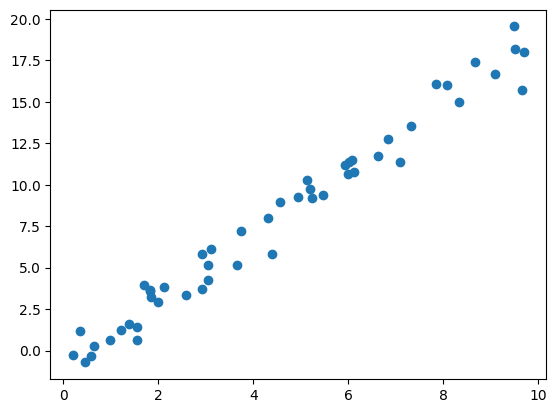

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [2]:
class MyLinearRegression():
    _coefs: np.ndarray = None
    
    def fit(self, X, Y): 
        Q = X
        self._coefs = np.dot(np.linalg.inv(np.dot(Q.transpose(), Q)), np.dot(Q.transpose(), Y))
        
    
    def predict(self, X):
        return np.dot(X, self._coefs)


In [3]:
linreg = MyLinearRegression()

In [55]:
linreg.fit(x.reshape(-1, 1),y)

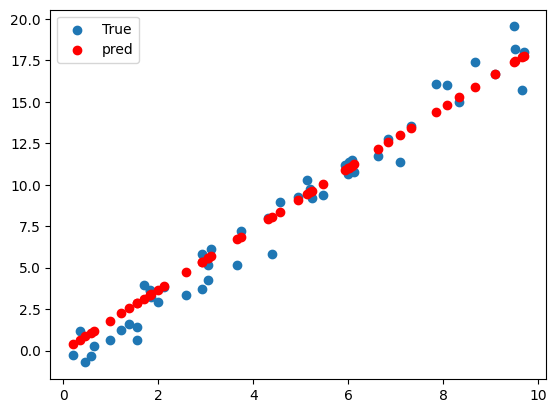

In [56]:
pred = linreg.predict(x.reshape(-1, 1))
plt.scatter(x, y, label="True")
plt.scatter(x,pred,  color='r',label="pred")
plt.legend() 
plt.show()

**Вывод**: модель точная. (данные с шумом, поэтому тут нет интерполяции)

## Задание 1.2

Используя модель линейной регрессии для многомерных входных данных, спрогнозируйте объём велосипедного трафика в зависимости от погодных условий. 

1. Проведите предварительное проектирование признаков. Отберите необходимые. Старайтесь учесть как можно больше факторов.
2. Обучите модель эстиматора. 
3. Определите коэффициент детерминации. 
4. Визуализируйте данные, для подтверждения точности прогноза.
5. Реализуйте модель эстиматора без использования встроенных библиотек, используя формул для многомерной регрессии. 
6. Сравните качество работы моделей.

Файлы: fremont-bridge.csv, BicycleWeather.csv 

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
bridge = pd.read_csv("fremont-bridge.csv")
weather = pd.read_csv("BicycleWeather.csv")

In [8]:
bridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45984 entries, 0 to 45983
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    45984 non-null  object 
 1   West    45976 non-null  float64
 2   East    45976 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


In [9]:
bridge["Date"] = pd.to_datetime(bridge.Date)
bridge["total"] = bridge.West + bridge.East
bridge["date"] = bridge.Date.map(lambda x: x.date())
bridge = bridge.drop(columns="Date")

<Axes: xlabel='date', ylabel='vals'>

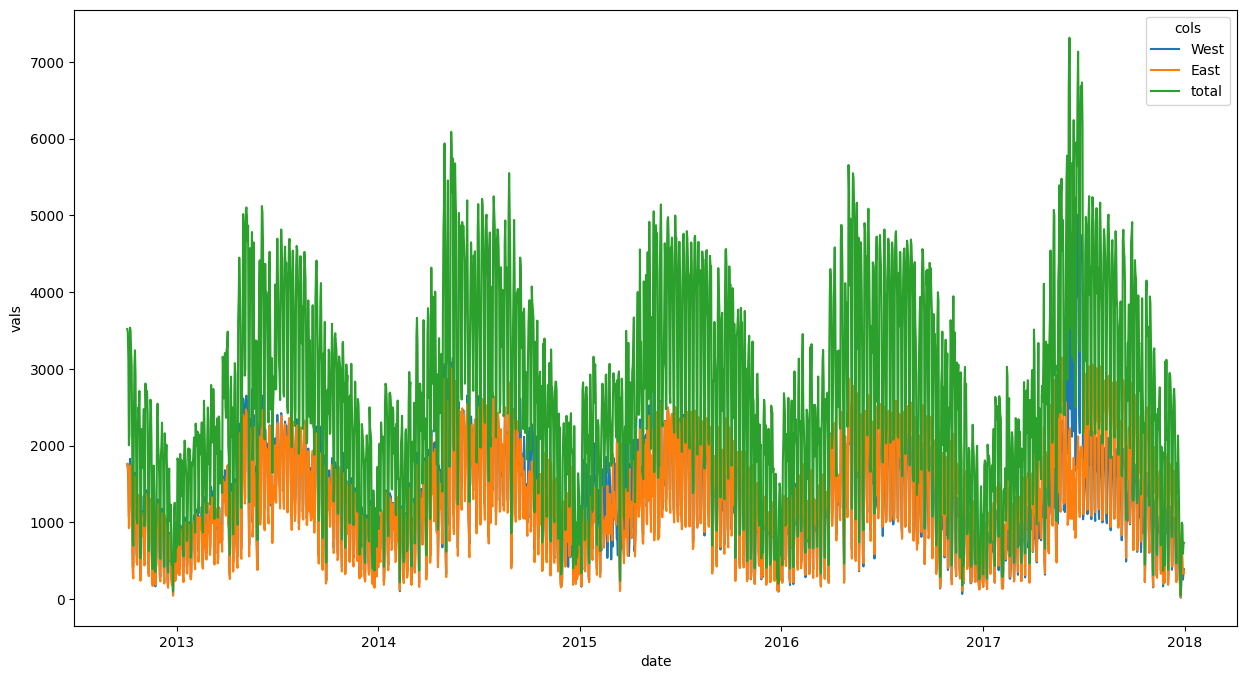

In [10]:
by_date = bridge.groupby("date").sum().reset_index()
by_date["date"] = pd.to_datetime(by_date.date)
plot_date = by_date.melt('date', var_name='cols', value_name='vals')
plt.figure(figsize=(15,8))
sns.lineplot(data = plot_date, x = "date", y = "vals", hue = "cols")

Трафик на мосту периодичное(сезонное) явление с точки зрения временных рядов.

In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATION       1340 non-null   object
 1   STATION_NAME  1340 non-null   object
 2   DATE          1340 non-null   int64 
 3   PRCP          1340 non-null   int64 
 4   SNWD          1340 non-null   int64 
 5   SNOW          1340 non-null   int64 
 6   TMAX          1340 non-null   int64 
 7   TMIN          1340 non-null   int64 
 8   AWND          1340 non-null   int64 
 9   WDF2          1340 non-null   int64 
 10  WDF5          1340 non-null   int64 
 11  WSF2          1340 non-null   int64 
 12  WSF5          1340 non-null   int64 
 13  FMTM          1340 non-null   int64 
 14  WT14          1340 non-null   int64 
 15  WT01          1340 non-null   int64 
 16  WT17          1340 non-null   int64 
 17  WT05          1340 non-null   int64 
 18  WT02          1340 non-null   int64 
 19  WT22  

In [12]:
weather.STATION.nunique()

1

In [13]:
weather.STATION_NAME.nunique()

1

Так как только одна станция, этот параметр можно убрать. 

In [14]:
weather = weather.drop(columns=["STATION", "STATION_NAME"])

In [15]:
weather["date"] = pd.to_datetime(weather.DATE, format="%Y%m%d")
weather = weather.drop(columns="DATE")

<Axes: >

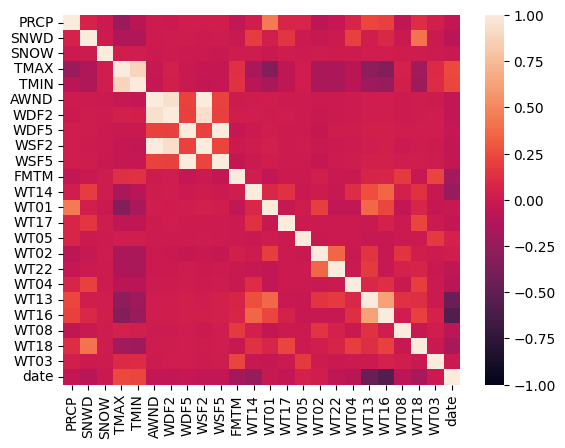

In [16]:
corr = weather.corr()
sns.heatmap(corr, vmin= -1, vmax= 1)

Достаточно коррелированные данные.

Почему корреляция плохо? Корреляция это линейная зависимость между признаками. Если таковы имеются, то матрица получается вырожденная. Поэтому уберем линейнозависимые признаки(где корреляция оранжевая или светлее). Date будем использовать как ключ. 

In [17]:
weather["T"] = weather.apply(lambda x: (x.TMAX + x.TMIN)/2, axis=1)
weather = weather.drop(columns=["TMAX", "TMIN", "WDF2", "WSF2", "WDF5", "WT14", "WT01", "WT02", "WT13", "WT22", "WT16", "WT18", "WT17", "WSF%"])

<Axes: >

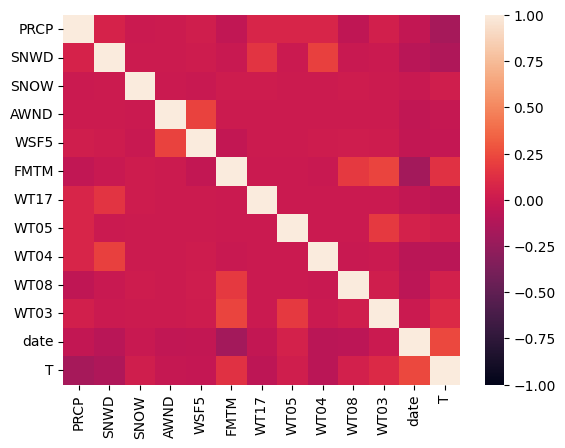

In [18]:
corr = weather.corr()
sns.heatmap(corr, vmin= -1, vmax= 1)

In [19]:
weather.date

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1335   2015-08-28
1336   2015-08-29
1337   2015-08-30
1338   2015-08-31
1339   2015-09-01
Name: date, Length: 1340, dtype: datetime64[ns]

In [20]:
full_data = by_date.merge(weather, on="date")

In [21]:
X = full_data.drop(columns = ["West", "East", "total", "date", "T"]).to_numpy()
Y_total = full_data["total"].to_numpy()

In [22]:
X.transpose()

array([[    0,     0,     0, ...,   102,     0,    58],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]])

In [38]:
Y_total

array([3521., 3475., 3148., ..., 1213., 2823., 2876.])

In [57]:
linreg = MyLinearRegression()
linreg.fit(X, Y_total)

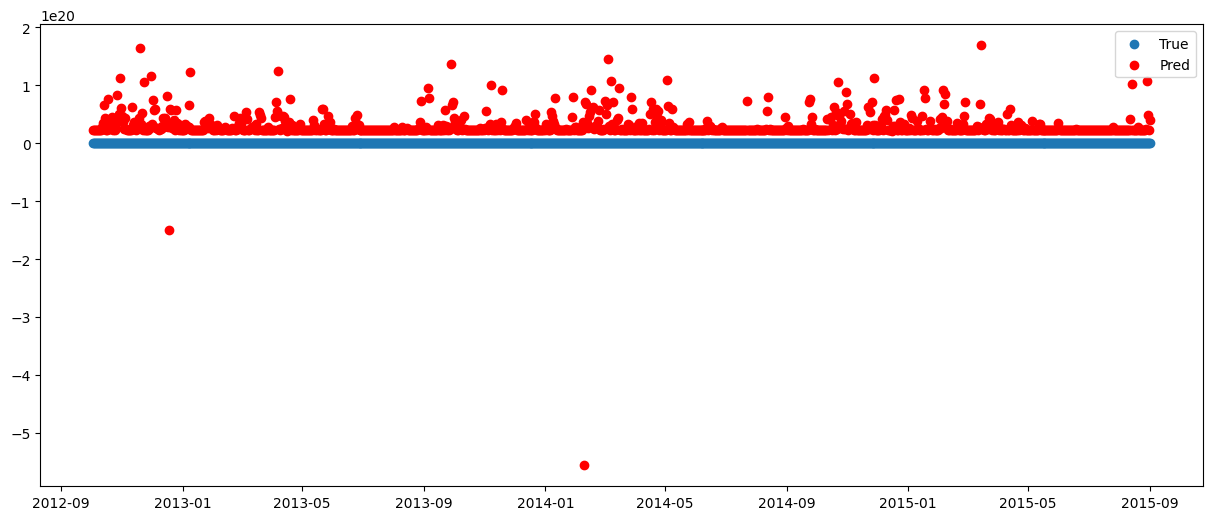

In [58]:
pred = linreg.predict(X)
plt.figure(figsize=(15,6))
plt.scatter(full_data["date"].to_numpy(),Y_total, label="True")
plt.scatter(full_data["date"].to_numpy(),pred, color='r', label="Pred")
plt.legend() 
plt.show()

In [ ]:
class MyPolyRegression():
    degree: int = 2
    
    def fit(X, Y):
        
    
    def predict(X):
        

Мне кажется 

## Задание 1.3 

Используя произвольную модель линейной регрессии для многомерных входных данных, спрогнозируйте объём производимого газа (столбец Prod). 

1. Проведите предварительное проектирование признаков. Отберите необходимые. 
2. Обучите модель эстиматора. 
3. Определите коэффициент детерминации. 
4. Визуализируйте данные, для подтверждения точности прогноза.
5. Постройте 3D визуализацию регресии по двум признакам.



Файлы: gas.csv

## Задание 1.4

Используя  модель полиномиальной регрессии, постройте наиболее точную модель прогноза зарплаты по позиции. Данные для обучение по ссылке. 

https://www.kaggle.com/akram24/position-salaries